In [1]:
print("python")

python


In [2]:
print("Hello world!")
print("This is a Python script.")

Hello world!
This is a Python script.


In [3]:
import pandas as pd

df = pd.read_csv("industrial_machinery_sample.csv")
df.head()

,Product Name,Price,Location
0,Customised Machines Equipment,"₹ 15,00,000/Piece",Ahmedabad
1,Rounak Heat Setter Machine,"₹ 1,50,000/Piece",New Delhi
2,Hydraulic Lathe Machine,"₹ 2,20,000/Unit",Coimbatore
3,CNC Milling Machine,"₹ 3,75,000/Piece",Pune
4,Paper Bag Making Machine,"₹ 6,50,000/Piece",Kolkata


In [6]:
def extract_numeric_price(price_str):
    if pd.isna(price_str):
        return None
    cleaned = price_str.replace("₹", "").replace(",", "").split("/")[0].strip()
    return float(cleaned)

df["Price_Numeric"] = df["Price"].apply(extract_numeric_price)
df[["Product Name", "Price", "Price_Numeric"]].head()


,Product Name,Price,Price_Numeric
0,Customised Machines Equipment,"₹ 15,00,000/Piece",1500000.0
1,Rounak Heat Setter Machine,"₹ 1,50,000/Piece",150000.0
2,Hydraulic Lathe Machine,"₹ 2,20,000/Unit",220000.0
3,CNC Milling Machine,"₹ 3,75,000/Piece",375000.0
4,Paper Bag Making Machine,"₹ 6,50,000/Piece",650000.0


In [7]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


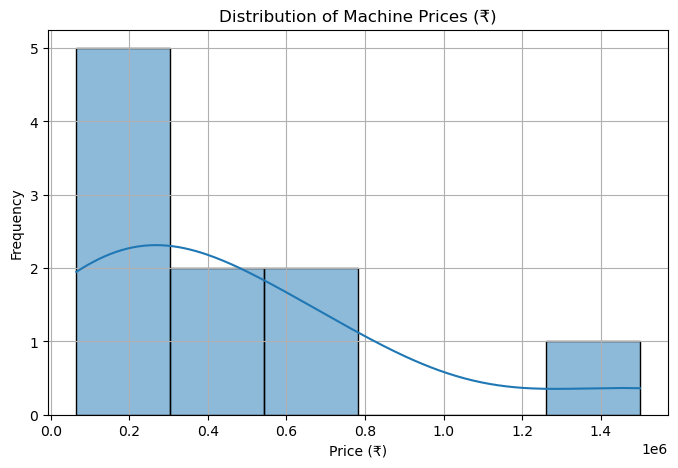

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["Price_Numeric"], bins=6, kde=True)
plt.title("Distribution of Machine Prices (₹)")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


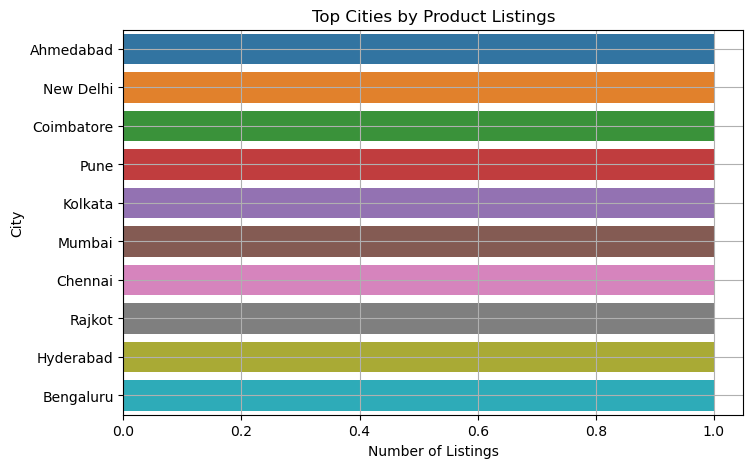

In [9]:
top_cities = df["Location"].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top Cities by Product Listings")
plt.xlabel("Number of Listings")
plt.ylabel("City")
plt.grid(True)
plt.show()


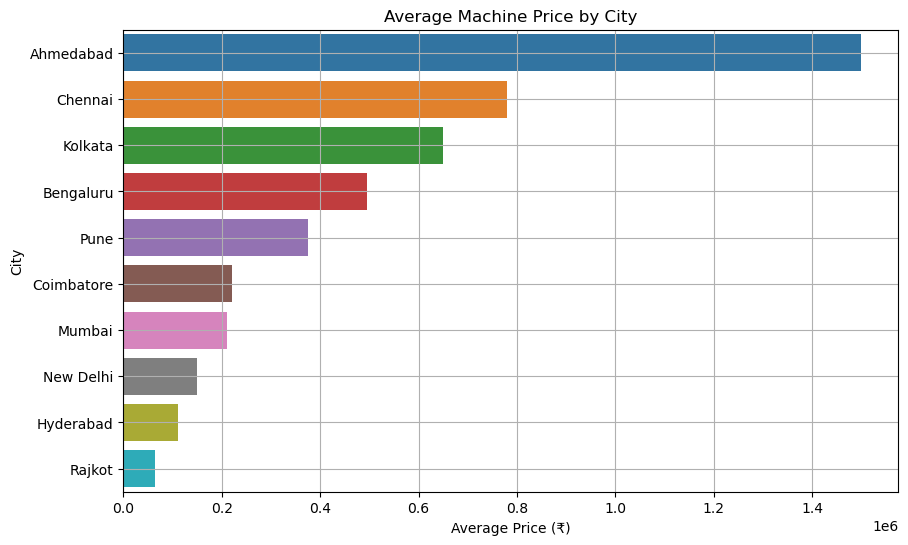

In [10]:
avg_price_by_city = df.groupby("Location")["Price_Numeric"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_city.values, y=avg_price_by_city.index)
plt.title("Average Machine Price by City")
plt.xlabel("Average Price (₹)")
plt.ylabel("City")
plt.grid(True)
plt.show()


In [11]:
outliers = df[df["Price_Numeric"] > 600000]
outliers[["Product Name", "Price", "Location"]]


,Product Name,Price,Location
0,Customised Machines Equipment,"₹ 15,00,000/Piece",Ahmedabad
4,Paper Bag Making Machine,"₹ 6,50,000/Piece",Kolkata
6,Plastic Injection Molding Machine,"₹ 7,80,000/Piece",Chennai


In [12]:
from collections import Counter

all_words = " ".join(df["Product Name"].dropna()).lower().split()
common_words = Counter(all_words)
top_words = common_words.most_common(10)
top_words


[('machine', 8),
 ('lathe', 2),
 ('molding', 2),
 ('customised', 1),
 ('machines', 1),
 ('equipment', 1),
 ('rounak', 1),
 ('heat', 1),
 ('setter', 1),
 ('hydraulic', 1)]

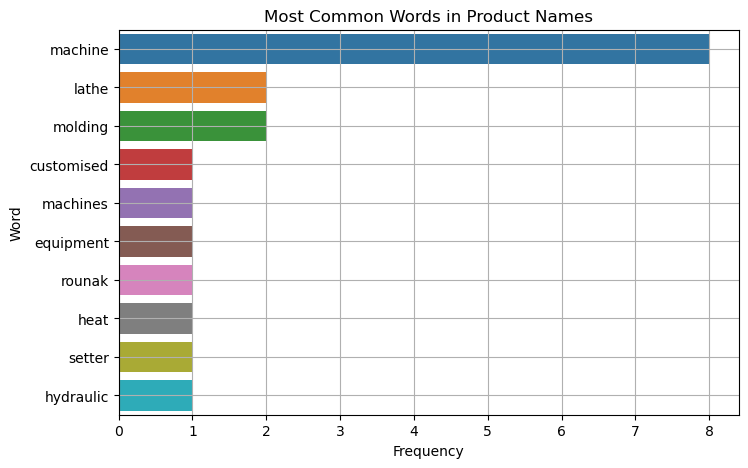

In [13]:
words, counts = zip(*top_words)

plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts), y=list(words))
plt.title("Most Common Words in Product Names")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.grid(True)
plt.show()
